<a href="https://colab.research.google.com/github/pacogp/TFM/blob/main/importancia_importe_comisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo 3: Evaluación e importancia de las comisiones dadas a representantes & Ventas


In [1]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IMPORTANCIA_IMPORTE_COMISIONES.csv to IMPORTANCIA_IMPORTE_COMISIONES.csv
User uploaded file "IMPORTANCIA_IMPORTE_COMISIONES.csv" with length 70340 bytes


In [2]:
# 0. load data in DataFrame
import pandas as pd
import io
comisiones = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), 
                    index_col = 'FECHA')
comisiones.head()

,Sum_COSTE_MP,Sum_COSTE_TAPIZADO,Sum_DTO_LINEAS,Sum_DTO_PP,Sum_I_BRUTO,Sum_I_COMISION,Sum_IMPORTE_LINEA,Sum_MARGEN_BRUTO,Sum_MARGEN_LINEA,Sum_NUMERO_PLAZAS,Sum_UNIDADES
FECHA,,,,,,,,,,,
2019-01-07,10922.96,3801.76,6775.79,785.59,94708.62,3476.88,22052.01,87147.26,11129.14,8325,66
2019-01-08,11589.97,3534.20,3774.80,826.00,69287.85,2924.53,26385.36,64687.02,14795.59,9425,65
2019-01-09,7419.34,1987.35,4354.72,532.01,45594.89,1619.78,16854.57,40708.12,9435.24,5900,40
2019-01-10,21573.77,6387.27,9544.78,2176.21,141297.03,6460.41,48475.74,129575.87,26902.13,19725,125
2019-01-11,7498.09,2175.50,4832.58,468.99,48067.80,1257.68,17564.48,42766.23,10066.46,6300,40


Vamos a dividir nuestro conjunto de datos en dos partes una para entrenamiento y otra para test. Para ello vamos a utilizar los datos de 2019 y la mitad de 2020 para entrenamiento y el resto de 2020 para los tests.

In [4]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [5]:
# 0.1 features and labels
df = comisiones[['Sum_COSTE_MP', 'Sum_COSTE_TAPIZADO', 'Sum_DTO_LINEAS', 'Sum_DTO_PP',
                 'Sum_I_BRUTO', 'Sum_I_COMISION', 'Sum_IMPORTE_LINEA', 'Sum_MARGEN_BRUTO', 
                 'Sum_MARGEN_LINEA', 'Sum_NUMERO_PLAZAS', 'Sum_UNIDADES']]

train = df.loc['2019-01-07':'2020-06-30']
test  = df.loc['2020-07-01':]

display_side_by_side(train.tail(),test.head())

,Sum_COSTE_MP,Sum_COSTE_TAPIZADO,Sum_DTO_LINEAS,Sum_DTO_PP,Sum_I_BRUTO,Sum_I_COMISION,Sum_IMPORTE_LINEA,Sum_MARGEN_BRUTO,Sum_MARGEN_LINEA,Sum_NUMERO_PLAZAS,Sum_UNIDADES
FECHA,,,,,,,,,,,
2020-06-24,23810.37,7888.05,29020.07,1620.05,279856.57,12087.12,53445.08,249216.50,29634.81,18800,126
2020-06-25,16545.46,5671.66,6757.42,3539.54,100236.12,4230.72,34717.84,89939.05,18172.51,11950,81
2020-06-26,10655.21,3376.65,6041.11,1459.54,72159.04,2522.34,24871.26,64658.39,14216.12,9125,61
2020-06-29,17365.09,4894.28,10677.48,1179.96,160801.94,7358.78,41092.04,148944.58,23726.96,16425,99
2020-06-30,17321.92,4759.93,7813.11,2089.48,136506.33,5983.14,39120.25,126603.72,21798.45,14000,97
,Sum_COSTE_MP,Sum_COSTE_TAPIZADO,Sum_DTO_LINEAS,Sum_DTO_PP,Sum_I_BRUTO,Sum_I_COMISION,Sum_IMPORTE_LINEA,Sum_MARGEN_BRUTO,Sum_MARGEN_LINEA,Sum_NUMERO_PLAZAS,Sum_UNIDADES
FECHA,,,,,,,,,,,
2020-07-01,20442.69,5692.48,8355.07,1227.36,252713.40,14817.28,48904.32,243130.88,28461.96,17100,114
2020-07-02,5872.88,1560.06,2130.03,464.71,31602.20,1320.11,13256.60,29007.47,7383.74,5025,29


In [6]:
# reseteamos el index con el fin de evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)

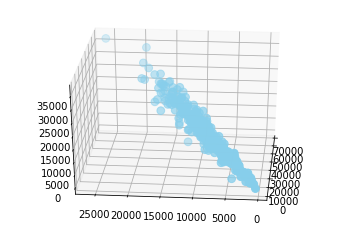

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['Sum_IMPORTE_LINEA'], train['Sum_NUMERO_PLAZAS'], train['Sum_MARGEN_LINEA'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()

1. Parametrización
Existen diferentes parámetros que se pueden optimizar para la utilización de RandomForests, en este caso vamos a ceñirnos a a optimizar el número de estimadores que vamos a probar con distintas potencias de 2

In [9]:
from sklearn.model_selection import TimeSeriesSplit
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
cv = TimeSeriesSplit() #

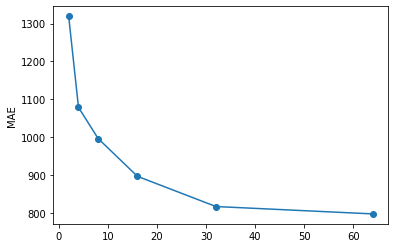

In [10]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

l_estimators = [2, 4, 8, 16, 32, 64]#, 128, 256, 512, 1024]

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='mae', random_state=0)
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['Sum_IMPORTE_LINEA'], axis=1), 
                           y = f_train['Sum_IMPORTE_LINEA'])
      y_pred = regressor.predict(X = f_test.drop(['Sum_IMPORTE_LINEA'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['Sum_IMPORTE_LINEA'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


  
plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')      
plt.show() 

In [11]:
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 64, MAE = 797.04)


# 2. Construcción y ejecución del modelo 

Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente 

In [14]:
# constructor
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='mae', 
                                   random_state=0)
# fit and predict

regressor.fit( X = train.drop(['Sum_IMPORTE_LINEA'], axis=1), y = train['Sum_IMPORTE_LINEA'])
y_pred = regressor.predict(X = test.drop(['Sum_IMPORTE_LINEA'], axis = 1))

Calculamos el mae obtenido. Cuando se trata de una competición esta línea la ejecuta la propia competición

In [16]:
mae = mean_absolute_error(test['Sum_IMPORTE_LINEA'], y_pred) 
print ('MAE', mae)

MAE 519.5639938668203


In [17]:
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'FECHA': test.index, 'result': res})


from google.colab import files

with open('result_comisiones.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result_comisiones.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


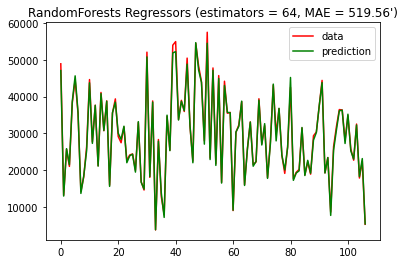

In [18]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['Sum_IMPORTE_LINEA'].shape[0]))
plt.plot(xx, test['Sum_IMPORTE_LINEA'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))

plt.show()

In [19]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('Sum_COSTE_MP', 'Sum_COSTE_TAPIZADO', 'Sum_DTO_LINEAS', 'Sum_DTO_PP',
                 'Sum_I_BRUTO', 'Sum_I_COMISION', 'Sum_MARGEN_BRUTO', 
                 'Sum_MARGEN_LINEA', 'Sum_NUMERO_PLAZAS', 'Sum_UNIDADES') ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Sum_COSTE_MP,0.140029
1,Sum_COSTE_TAPIZADO,0.008267
2,Sum_DTO_LINEAS,0.009429
3,Sum_DTO_PP,0.005326
4,Sum_I_BRUTO,0.007234
5,Sum_I_COMISION,0.007767
6,Sum_MARGEN_BRUTO,0.010252
7,Sum_MARGEN_LINEA,0.290317
8,Sum_NUMERO_PLAZAS,0.205641
9,Sum_UNIDADES,0.315739
